In [1]:
from data_clean import *
from error_detect import *

#  写入你的数据库路径

In [16]:
file_path = r"D:\Jilin_university\Harbin_bridge_pro\原始数据-按月\原始数据-按月\2022-07.csv" #导入数据库路径

In [17]:
dl = ds_load(file_path) #加载数据库

# 按时间顺序排序

In [18]:
dl.sort_by_time_order()

# 将索力数据存入字典当中(运行时间较长)

In [19]:
dl.df2dict_SLData_Date(0)
# dl.df2dict_SLData(1)

# 根据字典查询数据及日期 dict:{"SLS01":[1, 2, 3 , 4 , 5], "SLS02":[1, 4 ,5 ,6, 7, 8], ...}

In [6]:
dl.SLData_dict

{'SLS01': [5646.154,
  5647.881,
  5648.587,
  5648.716,
  5649.278,
  5642.809,
  5635.594,
  5634.669,
  5632.843,
  5630.795,
  5630.215,
  5630.45,
  5630.99,
  5632.855,
  5636.299,
  5639.965,
  5639.101,
  5636.932,
  5631.737,
  5630.009,
  5631.135,
  5636.288,
  5638.803,
  5640.056,
  5639.589,
  5639.266,
  5638.639,
  5638.335,
  5638.598,
  5636.903,
  5635.79,
  5635.134,
  5637.27,
  5640.116,
  5645.929,
  5648.68,
  5651.53,
  5653.378,
  5653.427,
  5655.42,
  5657.858,
  5653.559,
  5645.917,
  5640.227,
  5644.84,
  5652.405,
  5654.736,
  5660.425,
  5662.404,
  5663.082,
  5660.259,
  5652.399,
  5649.286,
  5641.492,
  5642.157,
  5646.464,
  5649.803,
  5654.422,
  5662.343,
  5664.51,
  5664.525,
  5666.332,
  5666.652,
  5666.59,
  5667.232,
  5665.541,
  5649.994,
  5645.626,
  5644.735,
  5650.311,
  5654.126,
  5659.327,
  5660.765,
  5662.848,
  5662.895,
  5663.497,
  5663.634,
  5653.164,
  5644.102,
  5639.05,
  5642.287,
  5648.321,
  5650.154,
  5652

In [7]:
dl.SLMdata_dict

{'SLS01': [Timestamp('2022-01-01 00:41:30'),
  Timestamp('2022-01-01 02:41:30'),
  Timestamp('2022-01-01 04:41:30'),
  Timestamp('2022-01-01 06:41:37'),
  Timestamp('2022-01-01 08:41:36'),
  Timestamp('2022-01-01 10:41:40'),
  Timestamp('2022-01-01 12:41:43'),
  Timestamp('2022-01-01 14:41:41'),
  Timestamp('2022-01-01 16:41:54'),
  Timestamp('2022-01-01 18:41:37'),
  Timestamp('2022-01-01 20:41:40'),
  Timestamp('2022-01-01 22:41:41'),
  Timestamp('2022-01-02 00:41:34'),
  Timestamp('2022-01-02 02:41:44'),
  Timestamp('2022-01-02 04:41:42'),
  Timestamp('2022-01-02 06:41:42'),
  Timestamp('2022-01-02 08:41:54'),
  Timestamp('2022-01-02 10:41:45'),
  Timestamp('2022-01-02 12:41:46'),
  Timestamp('2022-01-02 14:41:43'),
  Timestamp('2022-01-02 16:41:42'),
  Timestamp('2022-01-02 18:41:33'),
  Timestamp('2022-01-02 20:41:44'),
  Timestamp('2022-01-02 22:41:41'),
  Timestamp('2022-01-03 00:41:49'),
  Timestamp('2022-01-03 02:41:53'),
  Timestamp('2022-01-03 04:41:47'),
  Timestamp('2022-0

# Example(利用箱线法检测异常值)

In [12]:
SLdata_list = dl.SLData_dict["SLS03"]

[203, 237]


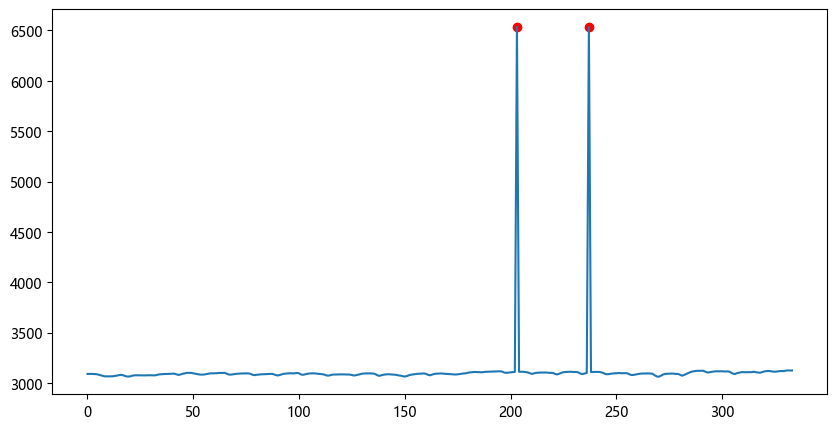

In [13]:
bp = box_plot()
error_index_list1 = bp.box_plot_train(SLdata_list)
print(error_index_list1)
plt.rcParams["figure.figsize"] = (10, 5)
dl.detect_error_pic(SLdata_list, error_index_list1)

# 下面以2020年1月份中方24个传感器为例

# 异常点检测图

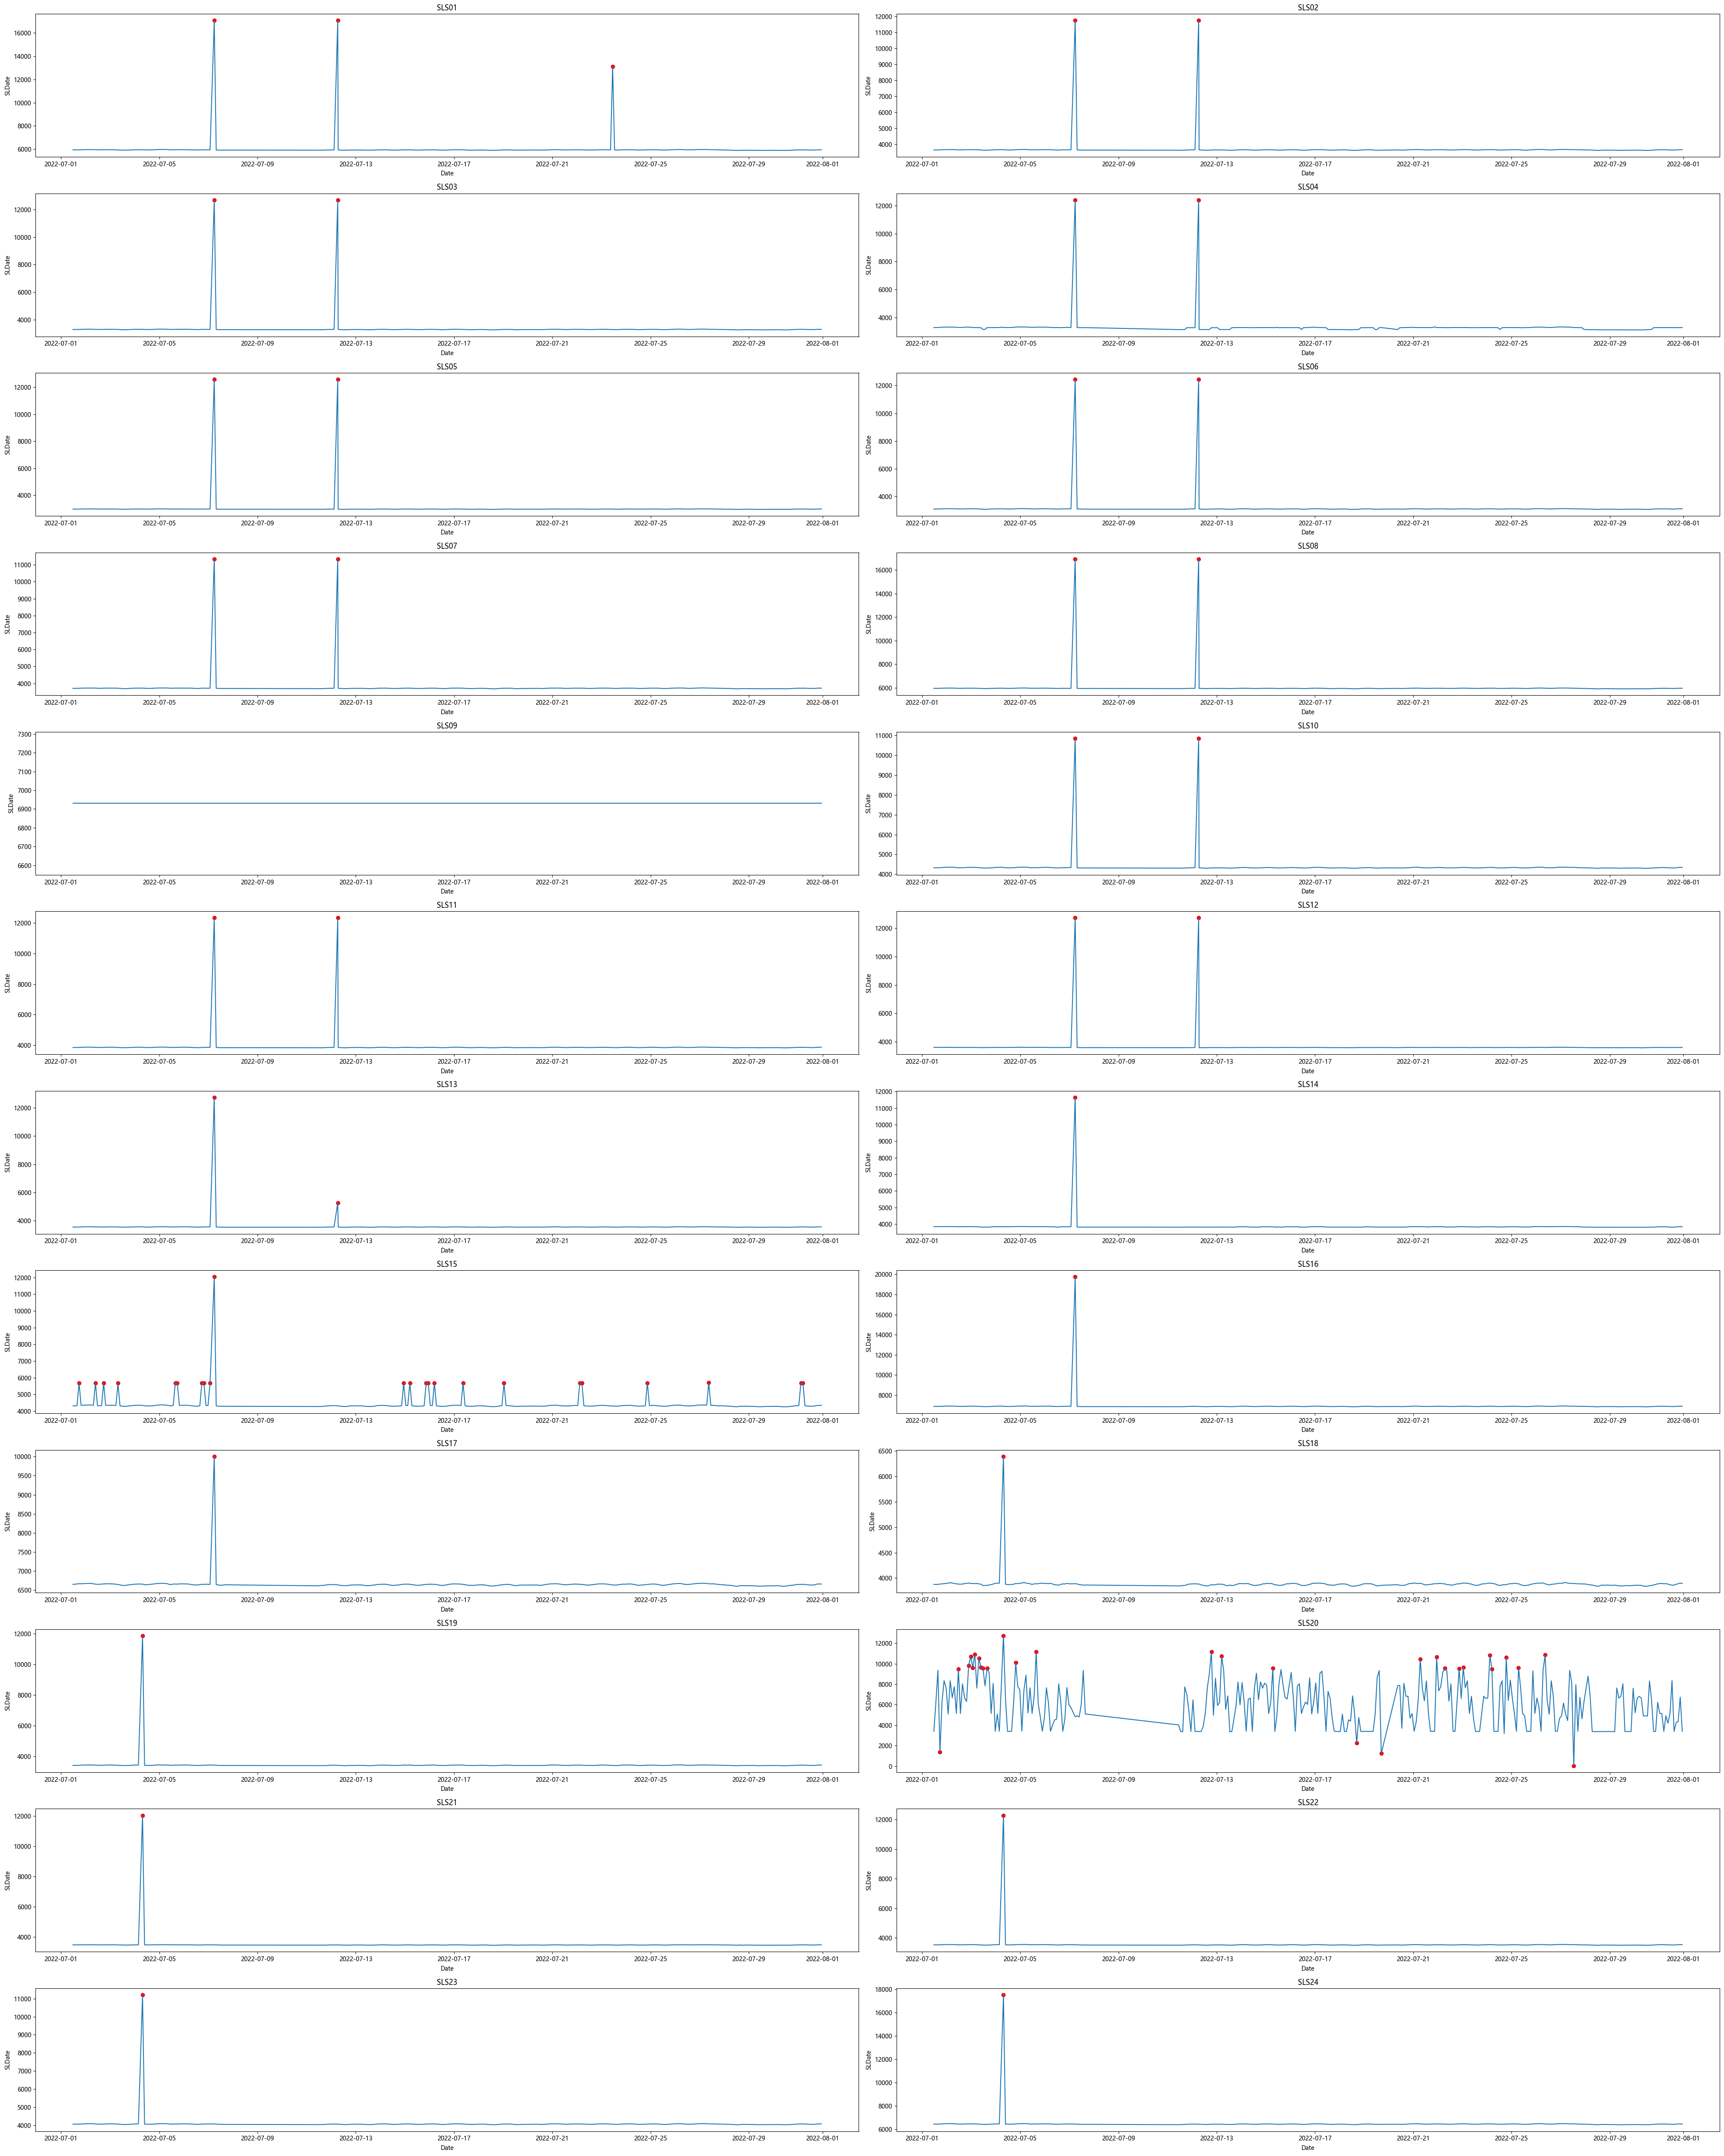

In [20]:
ts = three_sigma()
iosfor = iostation_forest()
km = k_means()
s = svm_()

fg = plt.figure(figsize = (40, 50))
for i in range(1, 25, 1):
    sensor_id = "SLS" + "0" + str(i) if i < 10 else "SLS" + str(i)
    
    SLData_list = dl.SLData_dict[sensor_id]
    SLMdate_list = dl.SLMdata_dict[sensor_id]
    
#     error_index_list = km.k_means_train(2, dl.SLData_dict[sensor_id])
    error_index_list = ts.three_sigma_(dl.SLData_dict[sensor_id])
#     plot_index = int(str(122) + str(i))
    ax = fg.add_subplot(12,2,i)
    ax.plot(dl.SLMdata_dict[sensor_id], dl.SLData_dict[sensor_id])
    ax.set_xlabel("Date")
    ax.set_ylabel("SLDate")
    ax.set_title(sensor_id)
    for error_index in error_index_list:
        ax.scatter(SLMdate_list[error_index], SLData_list[error_index], c = "r")
fg.tight_layout()
# ax1.rcParams["figure.figsize"] = (20, 10)

# 填补图

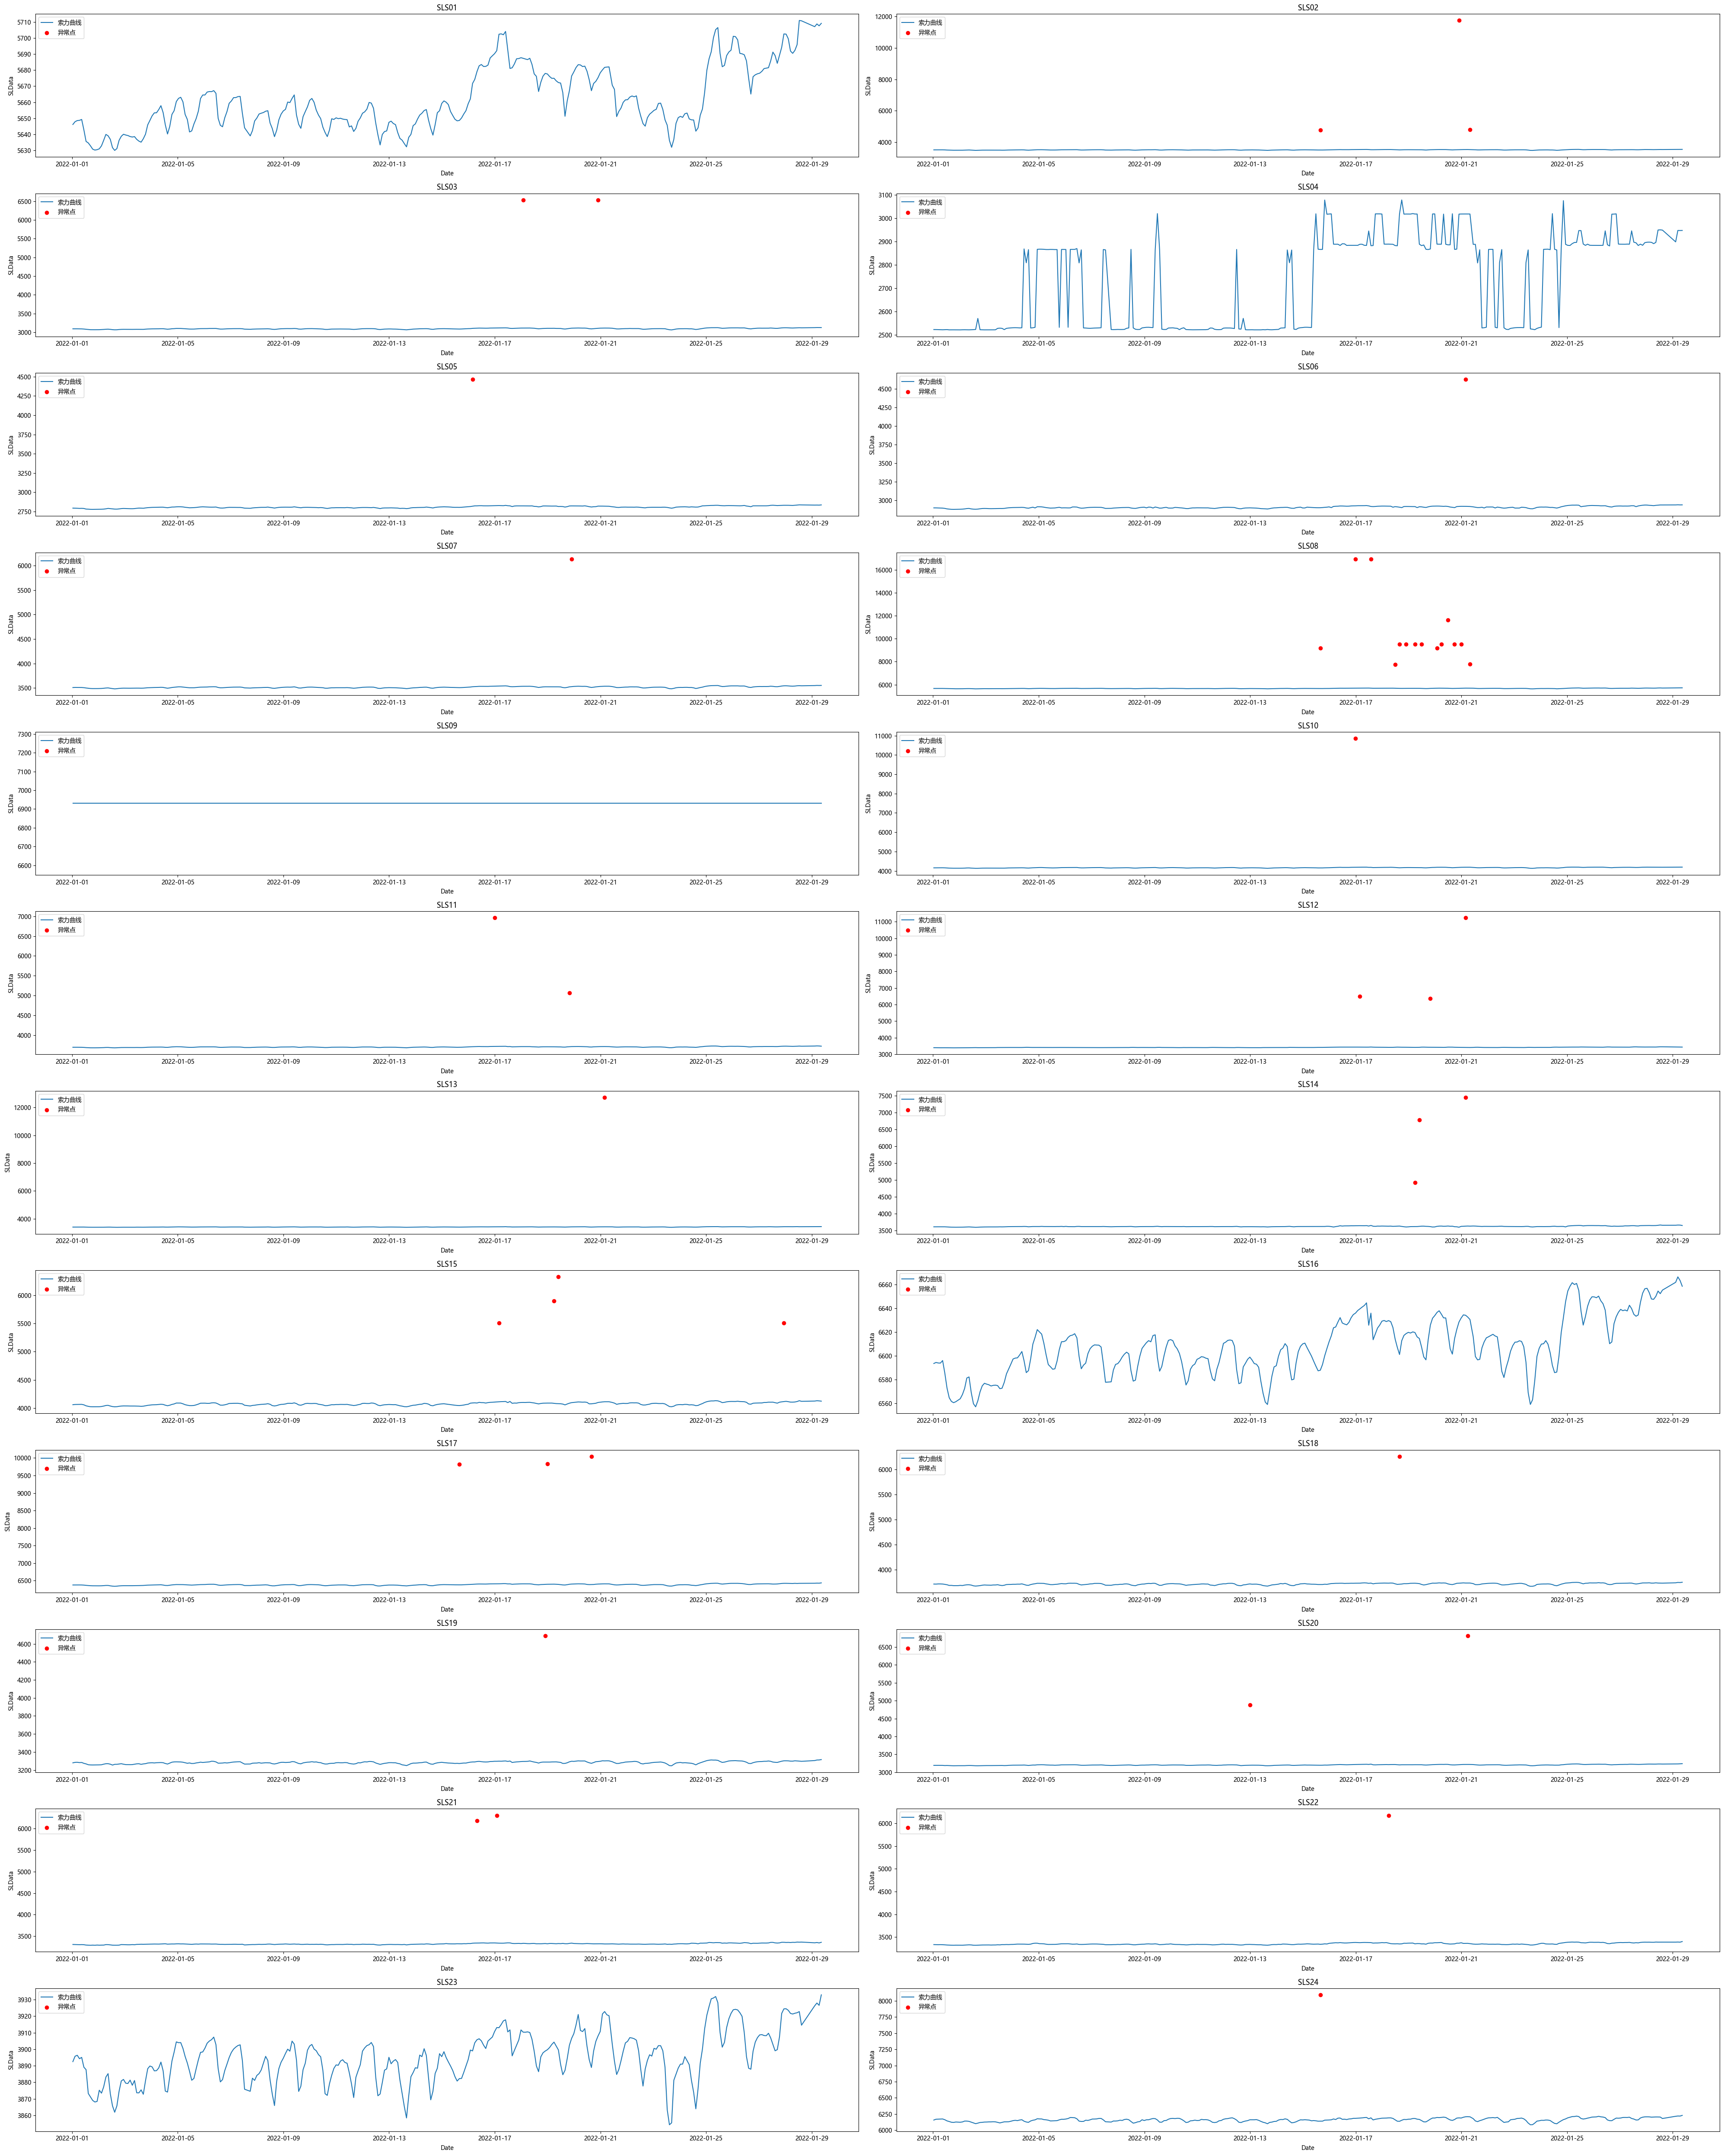

In [9]:
from matplotlib.font_manager import FontProperties #字体管理器
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

fg = plt.figure(figsize = (40, 50))
for i in range(1, 25, 1):
    sensor_id = "SLS" + "0" + str(i) if i < 10 else "SLS" + str(i)
    
    SLData_list = dl.SLData_dict[sensor_id]
    SLMdate_list = dl.SLMdata_dict[sensor_id]

    error_index_list = ts.three_sigma_(SLData_list)
    new_SLDate_list = fill_point(SLData_list, error_index_list)
#     plot_index = int(str(122) + str(i))
    ax = fg.add_subplot(12,2,i)
    ax.plot(SLMdate_list, new_SLDate_list, label = "索力曲线")
    ax.set_xlabel("Date")
    ax.set_ylabel("SLData")
    ax.set_title(sensor_id)
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    error_data_date = []
    error_data = []
    for error_index in error_index_list:
        error_data_date.append(SLMdate_list[error_index])
        error_data.append(SLData_list[error_index])
    ax.scatter(error_data_date, error_data, c = "r", label = "异常点")
    ax.legend(loc='upper left')
fg.tight_layout()